In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from data_handling.api import direct_download, distinct_download
from utilities import time_series_split

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [51]:
tickers = ['IVV', 'EFA', 'EEM', 'IEF', 'USIG', 'EMB']
data = await distinct_download(tickers)

In [56]:
data['EFA']

,adj_close,adj_high,adj_low,adj_open,adj_volume
date,,,,,
2001-08-27,26.863148,26.925864,26.821338,26.925864,44700.0
2001-08-28,26.549570,26.716812,26.507760,26.675001,319800.0
2001-08-29,26.445045,26.633191,26.403234,26.633191,128400.0
2001-08-30,26.068751,26.131467,25.985131,26.131467,36900.0
2001-08-31,26.131467,26.173277,26.006036,26.047846,1656900.0
2001-09-04,25.525217,25.817889,25.525217,25.567027,570000.0
2001-09-05,25.378881,25.525217,25.295260,25.441596,31500.0
2001-09-06,24.793536,24.981682,24.793536,24.981682,284700.0
2001-09-07,24.647200,24.751725,24.563579,24.751725,99900.0


In [3]:
result_dict = {}
test_dict = {}
for ticker, frame in data.items():
    # Selecting column inside list keeps it as a dataframe so extra columns can be added
    # Calculate daily log returns
    new_frame = np.log(frame[['adj_close']]).diff()
    # Sum on a rolling monthly basis to create rolling monthly returns
    new_frame['adj_close'] = new_frame['adj_close'].rolling(21).sum()
    
    for t in range(1, 13):
        # Monthly return from t months ago
        new_frame[f'autoregress_{t}'] = new_frame['adj_close'].shift(21 * t)
        # Mean return over the last t months
        new_frame[f'ma_{t}'] = new_frame['adj_close'].rolling(21 * t).mean()
    
    # Roll monthly returns back one month for prediction
    new_frame['adj_close'] = new_frame['adj_close'].shift(-21)
    test_dict[ticker] = new_frame
    result_dict[ticker] = new_frame.dropna()

In [265]:
focus = result_dict['IVV']
x_train, x_test, y_train, y_test = time_series_split(focus.drop(columns='adj_close'), focus['adj_close'])

# Ridge Regression

In [ ]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [19]:
# It is my belief that because of the way I have structured the data, doing standard cross validation shouldn't
# skew results because of autocorrelation etcetera
model = RidgeCV(alphas=[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10], scoring='neg_mean_squared_error')
model.fit(x_train, y_train)

RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [33]:
scores = cross_val_score(model, x_train, y_train, scoring='r2', cv=10)

In [34]:
np.mean(scores)

-0.28621588072545734

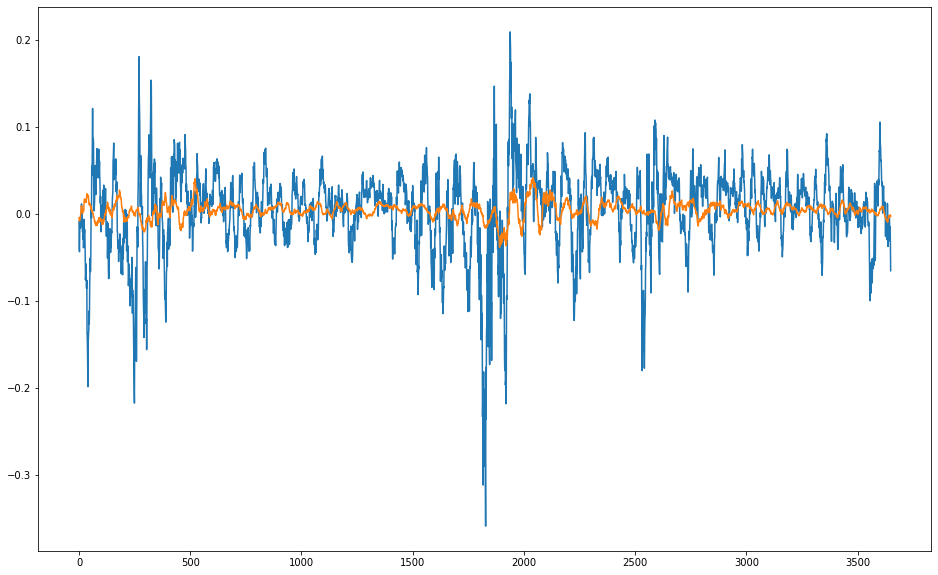

In [35]:
# Train set
plt.plot(y_train.values)
plt.plot(model.predict(x_train))

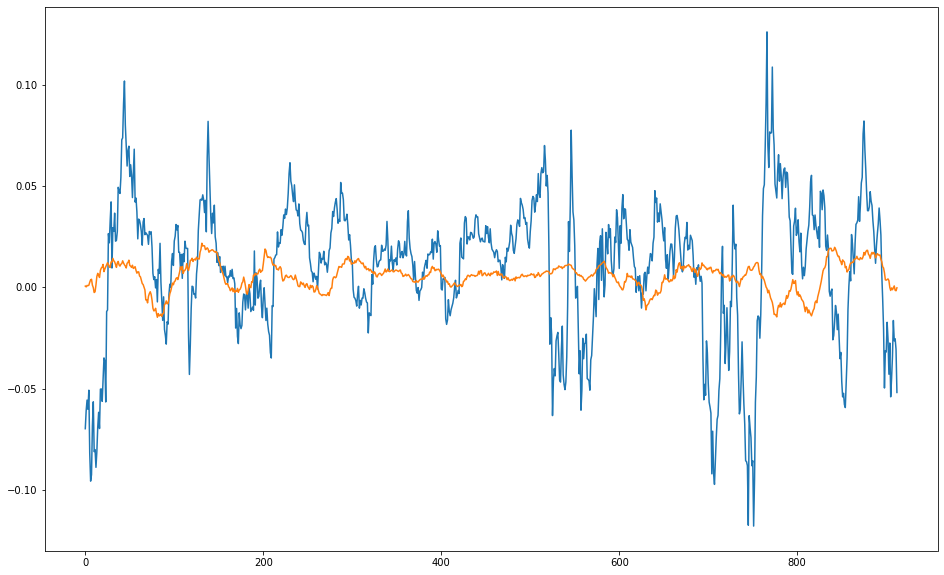

In [40]:
# Test set
plt.plot(y_test.values)
plt.plot(model.predict(x_test))

# Feed Forward Neural Network

In [5]:
import torch
from torch import nn, optim

torch.set_default_dtype(torch.float64)

In [6]:
# Standardization of inputs
def stan(x):
    return (x - np.mean(x)) / np.std(x)
x_train = stan(x_train)
x_test = stan(x_test)

In [7]:
# Two hidden layers. SELU activation.
# Outputs a vector of means and a vector of standard deviations to parameterize a Normal distribution
# https://medium.com/capital-one-tech/reasonable-doubt-get-onto-the-top-35-mnist-leaderboard-by-quantifying-aleatoric-uncertainty-a8503f134497
class SeluLinear(nn.Module):
    def __init__(self, in_features, hidden_size):
        super().__init__()
        self.selu = nn.SELU()
        self.drop = nn.Dropout(0.50)
        self.hidden_linear = nn.Linear(in_features, hidden_size)
        self.hidden_linear2 = nn.Linear(hidden_size, hidden_size)
        self.mean_out = nn.Linear(hidden_size, 1)
        self.std_out = nn.Linear(hidden_size, 1)
        self.softplus = nn.Softplus()
    
    def forward(self, x):
        hidden = self.selu(self.hidden_linear(x))
        hidden = self.drop(hidden)
        hidden = self.selu(self.hidden_linear2(hidden))
        hidden = self.drop(hidden)
        mean_out = self.mean_out(hidden)
        # Use softplus to guarantee positivity of standard deviation
        std_out = self.softplus(self.std_out(hidden))
        return mean_out, std_out

# Negative log likelihood loss function
class LogLikeLoss(nn.Module):
    def __init__(self, mean, std):
        super().__init__()
        self.dist = torch.distributions.Normal(loc=mean, scale=std)
    
    def forward(self, x):
        prob = self.dist.log_prob(x)
        return -prob.sum()

In [8]:
in_features = len(x_train.columns)
hidden_size = 100

model = SeluLinear(in_features, hidden_size)

In [9]:
# TODO: Randomly select batched subset
#optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-3)
optimizer = optim.Adam(model.parameters(), lr=1e-4)

losses = []

features = torch.as_tensor(x_train.values)
target = torch.as_tensor(y_train.values.reshape(-1, 1))

model.train()

for epoch in range(1000):
    means, stds = model(features)
    criterion = LogLikeLoss(means, stds)
    loss = criterion(target)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Loss: {loss}")
    losses.append(loss)
        
    print(f"Epoch {epoch} complete.")

Loss: 3545.8858300276015
Epoch 0 complete.
Loss: 4303.848122571839
Epoch 1 complete.
Loss: 3607.5137692456456
Epoch 2 complete.
Loss: 4070.514178131182
Epoch 3 complete.
Loss: 4240.583039162408
Epoch 4 complete.
Loss: 3777.22759015154
Epoch 5 complete.
Loss: 3806.40035099381
Epoch 6 complete.
Loss: 3697.4789566209975
Epoch 7 complete.
Loss: 3270.4759009945965
Epoch 8 complete.
Loss: 3912.5840222597485
Epoch 9 complete.
Loss: 3210.281644249487
Epoch 10 complete.
Loss: 3135.8672498628825
Epoch 11 complete.
Loss: 3248.4669888530916
Epoch 12 complete.
Loss: 3095.478009244507
Epoch 13 complete.
Loss: 3042.081771987326
Epoch 14 complete.
Loss: 3117.5836484479905
Epoch 15 complete.
Loss: 3001.0120485981765
Epoch 16 complete.
Loss: 3003.596879008104
Epoch 17 complete.
Loss: 2958.77614508851
Epoch 18 complete.
Loss: 3643.0832561294433
Epoch 19 complete.
Loss: 2970.072237354007
Epoch 20 complete.
Loss: 3069.1124266586903
Epoch 21 complete.
Loss: 2801.5514335469734
Epoch 22 complete.
Loss: 2791.0

Loss: 1144.6175844073518
Epoch 189 complete.
Loss: 1163.7843872513558
Epoch 190 complete.
Loss: 1168.8644171133492
Epoch 191 complete.
Loss: 1141.2526514257788
Epoch 192 complete.
Loss: 1117.8242160520153
Epoch 193 complete.
Loss: 1218.608090474987
Epoch 194 complete.
Loss: 1129.9901075457092
Epoch 195 complete.
Loss: 1078.9392157364023
Epoch 196 complete.
Loss: 1079.9133157974634
Epoch 197 complete.
Loss: 1086.2375475839915
Epoch 198 complete.
Loss: 1047.9202717548396
Epoch 199 complete.
Loss: 1061.7507786637518
Epoch 200 complete.
Loss: 1025.5384682588915
Epoch 201 complete.
Loss: 1023.6897598512188
Epoch 202 complete.
Loss: 1034.9876649614728
Epoch 203 complete.
Loss: 989.8617706676365
Epoch 204 complete.
Loss: 1006.849225089835
Epoch 205 complete.
Loss: 976.5985870143561
Epoch 206 complete.
Loss: 1052.454835687561
Epoch 207 complete.
Loss: 995.2462575042349
Epoch 208 complete.
Loss: 950.0295667949869
Epoch 209 complete.
Loss: 958.1068561674646
Epoch 210 complete.
Loss: 903.02853778

Loss: -860.992603684778
Epoch 373 complete.
Loss: -806.9082775083147
Epoch 374 complete.
Loss: -831.4893208297797
Epoch 375 complete.
Loss: -799.6771034206903
Epoch 376 complete.
Loss: -871.7920858201614
Epoch 377 complete.
Loss: -883.2048762000296
Epoch 378 complete.
Loss: -948.0617330084078
Epoch 379 complete.
Loss: -912.2716810956573
Epoch 380 complete.
Loss: -908.7179421125734
Epoch 381 complete.
Loss: -771.4486626968155
Epoch 382 complete.
Loss: -1001.8298068685864
Epoch 383 complete.
Loss: -916.6359288951712
Epoch 384 complete.
Loss: -948.9887375620254
Epoch 385 complete.
Loss: -999.8571698499012
Epoch 386 complete.
Loss: -1028.459953189877
Epoch 387 complete.
Loss: -1042.2364686940116
Epoch 388 complete.
Loss: -1134.3435594566113
Epoch 389 complete.
Loss: -1108.206357805992
Epoch 390 complete.
Loss: -1071.8379533549166
Epoch 391 complete.
Loss: -1029.003633989327
Epoch 392 complete.
Loss: -1038.5924768598654
Epoch 393 complete.
Loss: -1043.3549750619409
Epoch 394 complete.
Loss:

Loss: -3249.020621427655
Epoch 555 complete.
Loss: -3302.84901790718
Epoch 556 complete.
Loss: -3226.137645847587
Epoch 557 complete.
Loss: -3318.711952906753
Epoch 558 complete.
Loss: -3260.7876387879096
Epoch 559 complete.
Loss: -3432.170569742433
Epoch 560 complete.
Loss: -3313.826721188436
Epoch 561 complete.
Loss: -3383.0156169567204
Epoch 562 complete.
Loss: -3338.905230327881
Epoch 563 complete.
Loss: -3476.821356082323
Epoch 564 complete.
Loss: -3529.0597154408547
Epoch 565 complete.
Loss: -3362.17034428355
Epoch 566 complete.
Loss: -3565.0682742402273
Epoch 567 complete.
Loss: -3420.7375932898526
Epoch 568 complete.
Loss: -3510.339200482751
Epoch 569 complete.
Loss: -3464.335718637364
Epoch 570 complete.
Loss: -3599.9269176246703
Epoch 571 complete.
Loss: -3436.7967761161385
Epoch 572 complete.
Loss: -3503.997593465391
Epoch 573 complete.
Loss: -3560.6939142051083
Epoch 574 complete.
Loss: -3747.3258471393488
Epoch 575 complete.
Loss: -3564.6726711440133
Epoch 576 complete.
Lo

Loss: -5028.413944328736
Epoch 737 complete.
Loss: -5092.7010352671
Epoch 738 complete.
Loss: -4996.709932443724
Epoch 739 complete.
Loss: -5081.169934988259
Epoch 740 complete.
Loss: -5080.700785234716
Epoch 741 complete.
Loss: -5110.978874781315
Epoch 742 complete.
Loss: -4925.30304677616
Epoch 743 complete.
Loss: -5004.993908411864
Epoch 744 complete.
Loss: -5149.709633011598
Epoch 745 complete.
Loss: -5018.473852081344
Epoch 746 complete.
Loss: -4964.851543275155
Epoch 747 complete.
Loss: -5008.481578566112
Epoch 748 complete.
Loss: -5086.988010939524
Epoch 749 complete.
Loss: -5053.371137135471
Epoch 750 complete.
Loss: -5024.265352347049
Epoch 751 complete.
Loss: -4940.475790222318
Epoch 752 complete.
Loss: -5088.449513942183
Epoch 753 complete.
Loss: -4959.45962165761
Epoch 754 complete.
Loss: -5153.747938220983
Epoch 755 complete.
Loss: -5086.93174710374
Epoch 756 complete.
Loss: -5254.196443780042
Epoch 757 complete.
Loss: -5070.038937848254
Epoch 758 complete.
Loss: -5167.057

Loss: -5303.723287594883
Epoch 920 complete.
Loss: -5313.849438611084
Epoch 921 complete.
Loss: -5368.827110194679
Epoch 922 complete.
Loss: -5370.382888408888
Epoch 923 complete.
Loss: -5469.206272530936
Epoch 924 complete.
Loss: -5376.259288725463
Epoch 925 complete.
Loss: -5437.811650077843
Epoch 926 complete.
Loss: -5323.956923866584
Epoch 927 complete.
Loss: -5272.358638830573
Epoch 928 complete.
Loss: -5268.139697346008
Epoch 929 complete.
Loss: -5186.556134949307
Epoch 930 complete.
Loss: -5366.021467313393
Epoch 931 complete.
Loss: -5365.110608640339
Epoch 932 complete.
Loss: -5302.886102345108
Epoch 933 complete.
Loss: -5325.315601524068
Epoch 934 complete.
Loss: -5427.978826761962
Epoch 935 complete.
Loss: -5313.140763981124
Epoch 936 complete.
Loss: -5345.838694612175
Epoch 937 complete.
Loss: -5347.218579262236
Epoch 938 complete.
Loss: -5492.856743320557
Epoch 939 complete.
Loss: -5425.710168584372
Epoch 940 complete.
Loss: -5330.776024467937
Epoch 941 complete.
Loss: -529

In [10]:
with torch.no_grad():
    # Set model to eval to prevent dropout
    model.eval()
    means, stds = model(torch.as_tensor(x_train.values))
    test_means, test_stds = model(torch.as_tensor(x_test.values))

In [11]:
# Train set MSE
torch.mean((target - means)**2)

tensor(0.0023)

In [12]:
# Test set MSE
test_target = torch.as_tensor(y_test.values.reshape(-1, 1))
torch.mean((test_target - test_means)**2)

tensor(0.0011)

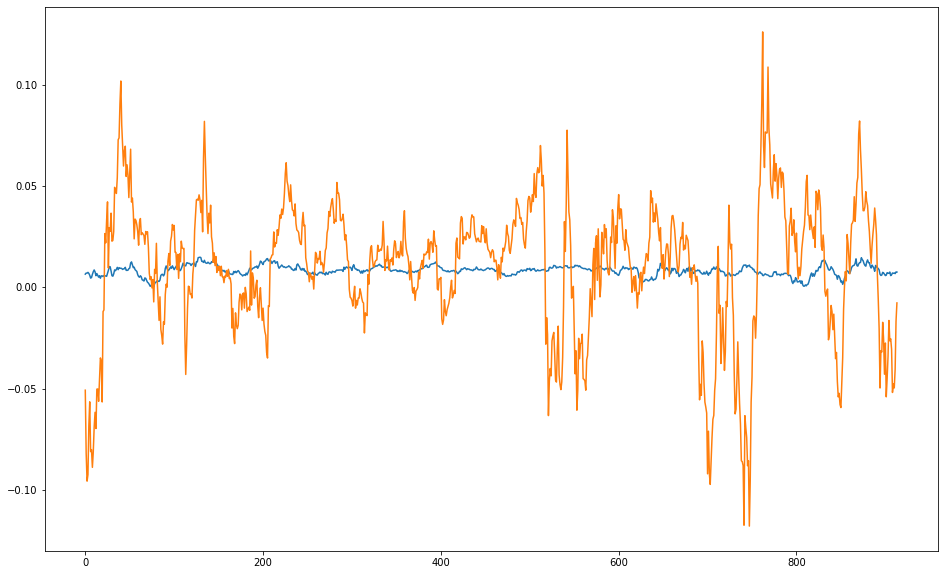

In [15]:
plt.plot(test_means)
plt.plot(y_test.values)

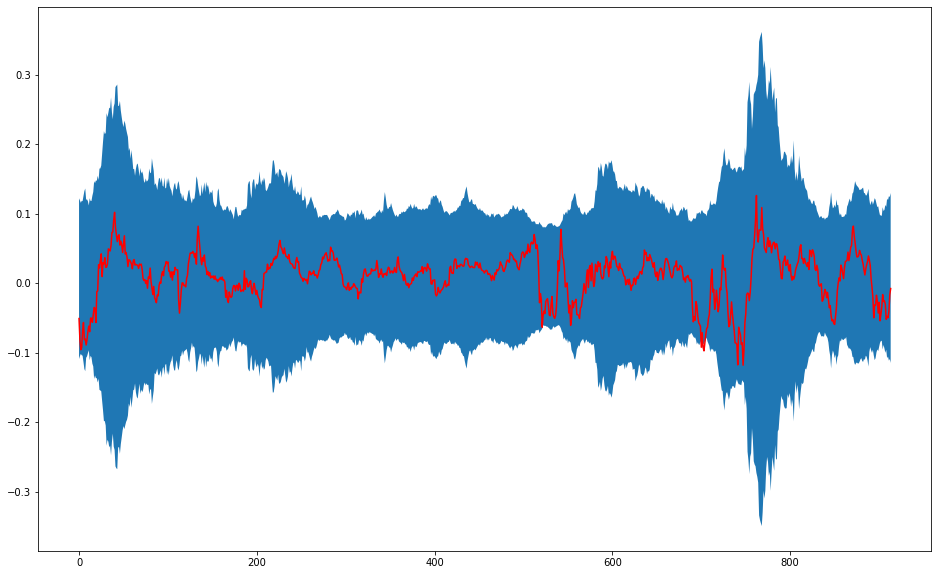

In [16]:
fig, ax = plt.subplots(1, 1)

x = np.arange(0, len(test_means))
y1 = (test_means - 2 * test_stds).numpy().reshape(-1)
y2 = (test_means + 2 * test_stds).numpy().reshape(-1)

ax.fill_between(x, y1, y2)
ax.plot(y_test.values, color='r')

# Recurrent Neural Network

In [6]:
result_dict = {}
for ticker, frame in data.items():
    # Selecting column inside list keeps it as a dataframe so extra columns can be added
    # Calculate daily log returns
    new_frame = np.log(frame[['adj_close']]).diff()
    # Sum on a rolling monthly basis to create rolling monthly returns
    new_frame['adj_close'] = new_frame['adj_close'].rolling(21).sum()
    result_dict[ticker] = new_frame.dropna()

In [7]:
focus = result_dict['IVV']
train_size = int(0.80 * len(focus))
x_train = focus.iloc[:train_size]
x_test = focus.iloc[train_size:]
y_train = focus.iloc[:train_size]
y_test = focus.iloc[train_size:]

In [8]:
# Standardization of inputs
def stan(x):
    return (x - np.mean(x)) / np.std(x)
x_train = stan(x_train)
x_test = stan(x_test)

In [37]:
class RNNModel(nn.Module):
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.LSTM(in_size, hidden_size, num_layers=2)
        self.output = nn.Linear(hidden_size, out_size)
        self.drop = nn.Dropout(0.5)
        
    def forward(self, x):
        h0 = torch.zeros(2, x.shape[1], self.hidden_size, requires_grad=True)
        c0 = torch.zeros(2, x.shape[1], self.hidden_size, requires_grad=True)
        _, rnn_output = self.rnn(x, (h0, c0))
        #rnn_output = self.drop(rnn_output)
        output = self.output(rnn_output[0].squeeze()[1])
        return output

In [46]:
in_size = 1
out_size = 1
hidden_size = 100

rnn_model = RNNModel(in_size, hidden_size, out_size)

In [47]:
# x is last 252 days of prices, y is price 252 days from now
# Returns list of x and y
def data_loader(x_train, y_train):
    xs = []
    ys = []
    for t in range(252, len(x_train) - 21):
        x = x_train.iloc[t - 252:t]
        x = torch.as_tensor(x.values)
        xs.append(x)
        y = y_train.iloc[t + 21]
        y = torch.as_tensor(y.values)
        ys.append(y)
    return xs, ys

In [48]:
# Randomly selects minibatch from inputs
def minibatch(x, y, size):
    length = x.shape[1]
    indexes = np.random.randint(0, length, size=size)
    return x[:, indexes, :], y[indexes]

In [49]:
loss_func = nn.MSELoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=1e-4)

losses = []

rnn_model.train()

x, y = data_loader(x_train, y_train)
x = torch.stack(x, dim=1)
y = torch.stack(y)

for t in range(500):
    batch_x, batch_y = minibatch(x, y, 100)
    optimizer.zero_grad()
    
    output = rnn_model(batch_x)
    loss = loss_func(output, batch_y)
    
    loss.backward()
    optimizer.step()

    print(f"Loss: {loss}")
    losses.append(loss)

Loss: 0.0024425660134418116
Loss: 0.003243367731521959
Loss: 0.002295223704032325
Loss: 0.0021036669777018454
Loss: 0.0020286985489221796
Loss: 0.0019767484796078603
Loss: 0.0015015396266200973
Loss: 0.0029891040479073606
Loss: 0.0028558315666617844
Loss: 0.0012000622202636283
Loss: 0.0024799617342354126
Loss: 0.002906113130448298
Loss: 0.0033698981835410015
Loss: 0.0014438775009627083
Loss: 0.0016323962068689707
Loss: 0.0024563491350995162
Loss: 0.001997249840525112
Loss: 0.0028473470049922055
Loss: 0.002122602395928261
Loss: 0.0018930655195727847
Loss: 0.0023961729427028388
Loss: 0.0023188379249972028
Loss: 0.003181128842092444
Loss: 0.00211319266472634
Loss: 0.0020839926425824423
Loss: 0.0033294119888469
Loss: 0.0020491997144630797
Loss: 0.0017055802820468674
Loss: 0.002089237811032607
Loss: 0.0023041729872538604
Loss: 0.0019686581177163574
Loss: 0.0025554047062367456
Loss: 0.001785212022026674
Loss: 0.0016834575957419345
Loss: 0.0023012408222047765
Loss: 0.0013950632075118185
Loss:

Loss: 0.001639997933205386
Loss: 0.00190816763484933
Loss: 0.002916637927464909
Loss: 0.0015935309742172053
Loss: 0.0027829911703178153
Loss: 0.001525809893108612
Loss: 0.003952450905735055
Loss: 0.0022234330464996387
Loss: 0.002219452507765462
Loss: 0.002359269231894441
Loss: 0.0027147895335299156
Loss: 0.004220832440685333
Loss: 0.002319521155833689
Loss: 0.0025533040822651467
Loss: 0.0022607032694627023
Loss: 0.0018745424860650197
Loss: 0.00154350966550956
Loss: 0.0018795986414468044
Loss: 0.002104166283455267
Loss: 0.0017305969650447748
Loss: 0.0017309189069608171
Loss: 0.0030540808617231857
Loss: 0.002333405266342867
Loss: 0.0017802265466826729
Loss: 0.0017414773111031105
Loss: 0.0025278168647322207
Loss: 0.0022809702679890314
Loss: 0.0031867220616122243
Loss: 0.0018210849532625487
Loss: 0.001841375521354554
Loss: 0.0022936048956332324
Loss: 0.001918805591402937
Loss: 0.0019198258212994104
Loss: 0.0016684164119259062
Loss: 0.0028376948120528707
Loss: 0.002252260131939114
Loss: 0.0

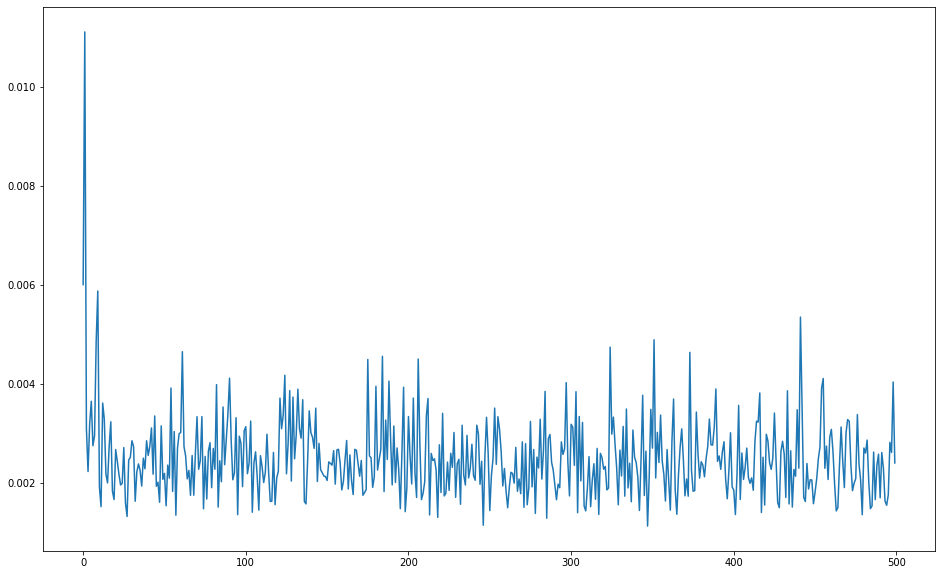

In [29]:
plt.plot(losses)

In [30]:
with torch.no_grad():
    test = rnn_model(x)

torch.Size([2, 3603, 100])


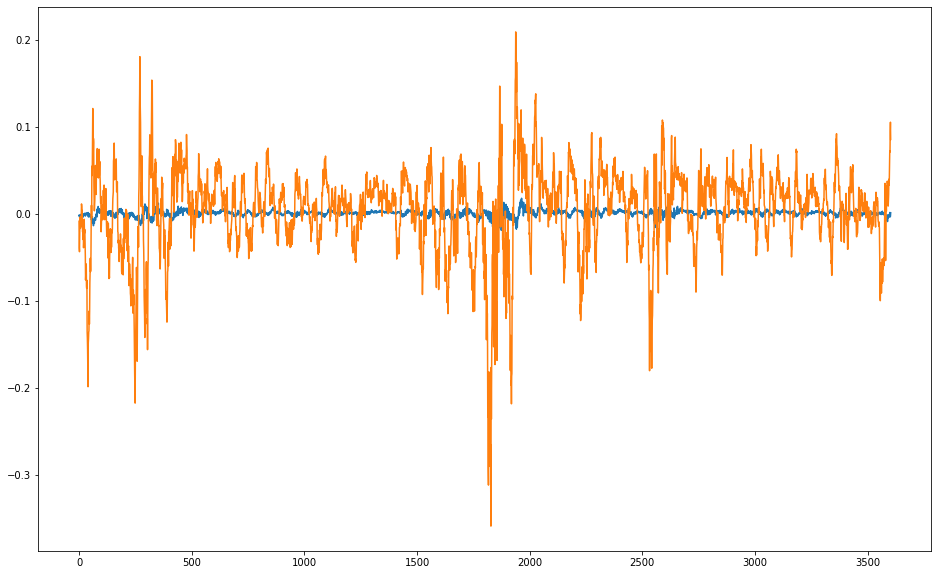

In [31]:
plt.plot(test.numpy())
plt.plot(y.numpy())